**Thesis Title:** Hybrid Machine Learning Models for Demand Forecasting in FMCG Supply Chains, Integrating External Factors for Enhanced Accuracy: A Case Study of an Iranian FMCG Company

**1. Introduction**

**1.1 Problem Statement**

In the FMCG industry, accurate demand forecasting is critical to ensure optimal inventory levels, improve sales planning, and reduce costs. However, companies often face significant challenges in forecasting demand due to several factors, including seasonality, holidays, and events like discounts and promotions.

These factors create fluctuations in demand that traditional forecasting models struggle to predict accurately, leading to either stockouts or overstocking, both of which negatively impact profitability.

Despite advances in forecasting techniques, most companies still rely on historical sales data and basic statistical methods, which fail to capture the full range of external influences that can affect product demand. In particular, external factors such as weather, holidays, and promotions are often underutilized, despite their clear impact on consumer purchasing behavior. The absence of these factors in forecasting models results in lower forecasting accuracy, which directly affects operational and financial outcomes.

**1.2 Problem Formulation**

This research aims to improve demand forecasting accuracy in FMCG supply chains by integrating external factors like seasonality, holidays, and promotions. Traditional forecasting models often struggle to account for these factors, leading to stockouts or overstocking, which harm profitability.

The central question is: How can hybrid machine learning models enhance demand forecasting accuracy by incorporating external factors?

 The research will focus on data preparation (structuring historical sales data with external factors), model development (combining time-series models with machine learning algorithms like LSTM, XGBoost, and LightGBM), and evaluation (comparing the performance of these models to traditional methods). The goal is to create a more accurate forecasting model that better handles FMCG demand fluctuations.

**1.3 Proposed Solution:**

This solution aims to enhance demand forecasting in FMCG supply chains by developing a hybrid machine learning model combining XGBoost, LightGBM, and LSTM. XGBoost and LightGBM handle complex feature relationships, while LSTM captures temporal dependencies in time-series data.

By integrating predictions from these models using stacking or a meta-model, like Linear Regression, the hybrid approach improves forecasting accuracy. The model also incorporates external factors such as promotions, holidays, and seasonality to better capture demand fluctuations. This hybrid model provides more robust, accurate forecasts for optimizing inventory and decision-making in FMCG supply chains.





**2. Data Collection**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Cheese.csv to Cheese.csv


**2.1 Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
import lightgbm as lgb
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import GridSearchCV

from keras.models import Sequential
from keras.layers import LSTM, Dense
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
import joblib



In [ ]:

file_path = "/content/Cheese.csv"
df = pd.read_csv(file_path, low_memory=False)

df.head()

,Company Name,SKU Name (English),Business,CAT,Sub-CAT,Branch,Channel,Month,Month Number,year,...,quarter,is_summer,is_winter,days_in_month,is_nowruz,is_ramadan,holiday_intensity,temp_c_sim,rain_mm_sim,tpr_log1p
0,Solico Group,AMAL PROCESS CHEESE 100 gr,Dairy,Cheese,Breakfast-Process Cheese,Bushehr,B2C,January,1,2022,...,1,0,1,31,0,0,0,12.7,35.0,5.843079178
1,Solico Group,AMAL PROCESS CHEESE 100 gr,Dairy,Cheese,Breakfast-Process Cheese,Bushehr,B2W,January,1,2022,...,1,0,1,31,0,0,0,12.7,35.0,2.732417558
2,Solico Group,AMAL PROCESS CHEESE 100 gr,Dairy,Cheese,Breakfast-Process Cheese,Bushehr,B2W,January,1,2022,...,1,0,1,31,0,0,0,12.7,35.0,0.157003749
3,Solico Group,AMAL PROCESS CHEESE 100 gr,Dairy,Cheese,Breakfast-Process Cheese,Parse,B2C,January,1,2022,...,1,0,1,31,0,0,0,8.8,35.0,4.75730144
4,Solico Group,AMAL PROCESS CHEESE 100 gr,Dairy,Cheese,Breakfast-Process Cheese,Parse,B2W,January,1,2022,...,1,0,1,31,0,0,0,8.8,35.0,4.829113417


In [ ]:

num_rows, num_columns = df.shape

# Print the number of rows and columns
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 54938
Number of columns: 26


**3. Data Exploration**

**3.1. Check for Missing Values**

In [ ]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Display the missing values count for each column
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Company Name            0
SKU Name (English)      0
Business                0
CAT                     0
Sub-CAT                 0
Branch                  0
Channel                 0
Month                   0
Month Number            0
year                    0
Sum of Vol (kg)         0
Sum of Box              0
TPR($)                  0
Value(Dollar)           0
Date                    0
month                   0
quarter                 0
is_summer               0
is_winter               0
days_in_month           0
is_nowruz               0
is_ramadan              0
holiday_intensity       0
temp_c_sim              0
rain_mm_sim             0
tpr_log1p             764
dtype: int64


**3.2. Convert 'tpr_log1p' to numeric**

In [ ]:

df['tpr_log1p'] = pd.to_numeric(df['tpr_log1p'], errors='coerce')

df.dtypes

,0
Company Name,object
SKU Name (English),object
Business,object
CAT,object
Sub-CAT,object
Branch,object
Channel,object
Month,object
Month Number,int64
year,int64


**3.3. Handling Missing Values**

In [ ]:
df.fillna(0, inplace=True)

# Verify if missing values have been handled
missing_values_after = df.isnull().sum()
print("Missing values after handling:\n", missing_values_after)

Missing values after handling:
 Company Name          0
SKU Name (English)    0
Business              0
CAT                   0
Sub-CAT               0
Branch                0
Channel               0
Month                 0
Month Number          0
year                  0
Sum of Vol (kg)       0
Sum of Box            0
TPR($)                0
Value(Dollar)         0
Date                  0
month                 0
quarter               0
is_summer             0
is_winter             0
days_in_month         0
is_nowruz             0
is_ramadan            0
holiday_intensity     0
temp_c_sim            0
rain_mm_sim           0
tpr_log1p             0
dtype: int64


**4. Feature Engineering**

In [ ]:
# Convert 'Date' column to datetime if it's not already in datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract year, month, and quarter from the 'Date' column
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['quarter'] = df['Date'].dt.quarter
df['is_summer'] = df['month'].isin([6, 7, 8]).astype(int)
df['is_winter'] = df['month'].isin([12, 1, 2]).astype(int)
df['days_in_month'] = df['Date'].dt.days_in_month

**4.1 Create Lag and Rolling Features**

In [ ]:
# Sort by product and date for lag features
df = df.sort_values(['SKU Name (English)', 'Branch', 'Channel', 'Date'])

# Create lag features (e.g., demand for the last 1, 2, 3 months)
df['lag_1'] = df.groupby(['SKU Name (English)', 'Branch', 'Channel'])['Sum of Vol (kg)'].shift(1)
df['lag_2'] = df.groupby(['SKU Name (English)', 'Branch', 'Channel'])['Sum of Vol (kg)'].shift(2)
df['lag_3'] = df.groupby(['SKU Name (English)', 'Branch', 'Channel'])['Sum of Vol (kg)'].shift(3)

# Create rolling mean feature (e.g., rolling average of the last 3 months)
df['roll_mean_3'] = df.groupby(['SKU Name (English)', 'Branch', 'Channel'])['Sum of Vol (kg)'].shift(1).rolling(window=3).mean()

**4.2. Visualizing the Sales Trend**

In [ ]:
# Install plotly (only needed once)
!pip install plotly

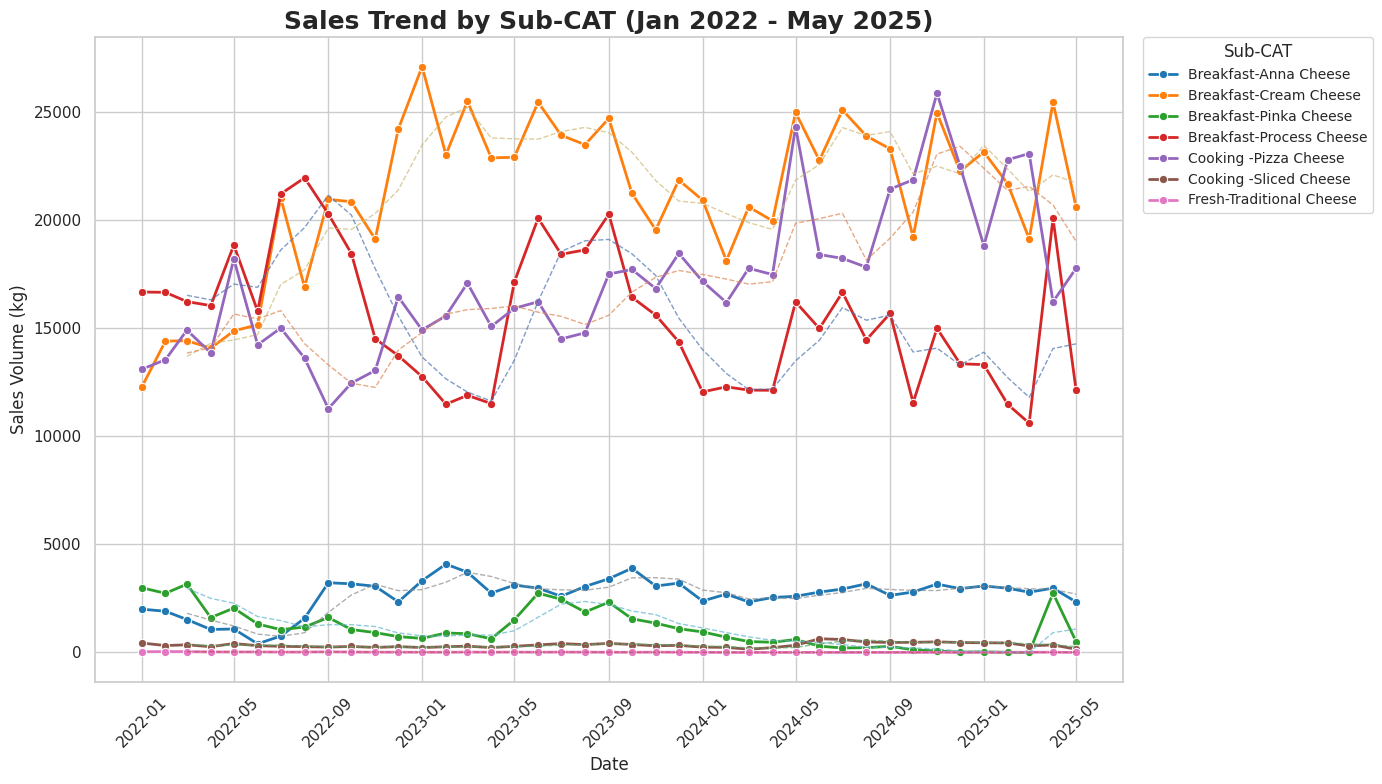

In [ ]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(14, 8))

# Group data by Date and Sub-CAT, then sum the sales volume
df_grouped = df.groupby(['Date', 'Sub-CAT'])['Sum of Vol (kg)'].sum().reset_index()


# Plot with lineplot for smooth handling of multiple categories
sns.lineplot(
    data=df_grouped,
    x="Date",
    y="Sum of Vol (kg)",
    hue="Sub-CAT",
    marker="o",
    linewidth=2,
    palette="tab10"
)

# Title and labels
plt.title("Sales Trend by Sub-CAT (Jan 2022 - May 2025)", fontsize=18, weight="bold")
plt.xlabel("Date", fontsize=12)
plt.ylabel("Sales Volume (kg)", fontsize=12)

# Rotate x-axis for readability
plt.xticks(rotation=45)

# Place legend outside
plt.legend(
    title="Sub-CAT",
    loc="upper left",
    bbox_to_anchor=(1.02, 1),
    borderaxespad=0,
    fontsize=10
)


for sub_cat in df_grouped['Sub-CAT'].unique():
    sub_cat_data = df_grouped[df_grouped['Sub-CAT'] == sub_cat]
    plt.plot(
        sub_cat_data["Date"],
        sub_cat_data["Sum of Vol (kg)"].rolling(3).mean(),
        linestyle="--",
        linewidth=1,
        alpha=0.7
    )

plt.tight_layout()
plt.show()

**5. Model Development**

**5.1 Preparing Data for Model Training**

In [ ]:

df = df.sort_values(['SKU Name (English)', 'Branch', 'Channel', 'Date'])

# Create lag features (e.g., demand for the last 1, 2, 3 months)
df['lag_1'] = df.groupby(['SKU Name (English)', 'Branch', 'Channel'])['Sum of Vol (kg)'].shift(1)
df['lag_2'] = df.groupby(['SKU Name (English)', 'Branch', 'Channel'])['Sum of Vol (kg)'].shift(2)
df['lag_3'] = df.groupby(['SKU Name (English)', 'Branch', 'Channel'])['Sum of Vol (kg)'].shift(3)

# Create rolling mean feature (e.g., rolling average of the last 3 months)
df['roll_mean_3'] = df.groupby(['SKU Name (English)', 'Branch', 'Channel'])['Sum of Vol (kg)'].shift(1).rolling(window=3).mean()

# Prepare features and target variable
features = ['year', 'month', 'quarter', 'is_summer', 'is_winter', 'days_in_month', 'lag_1', 'lag_2', 'lag_3', 'roll_mean_3']
target = 'Sum of Vol (kg)'

# Drop rows with missing values (if any) for target variable and lag features
df_model = df.dropna(subset=features + [target])

# Split the data into training and testing sets
train_size = int(len(df_model) * 0.8)  # 80% for training, 20% for testing
train_data = df_model[:train_size]
test_data = df_model[train_size:]

# Separate features and target for training and testing
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (41273, 10)
Shape of y_train: (41273,)
Shape of X_test: (10319, 10)
Shape of y_test: (10319,)


**5.2. Train XGBoost Model**

In [ ]:

# Train XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
xgb_mae = mean_absolute_error(y_test, y_pred_xgb)
# Calculate RMSE by taking the square root of the Mean Squared Error
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print(f"XGBoost MAE: {xgb_mae:.4f}")
print(f"XGBoost RMSE: {xgb_rmse:.4f}")

XGBoost MAE: 26.9167
XGBoost RMSE: 89.3653


**5.3. Train LightGBM Model**

In [ ]:

# Train LightGBM model
lgb_model = lgb.LGBMRegressor(n_estimators=200, learning_rate=0.1, num_leaves=31)
lgb_model.fit(X_train, y_train)

# Make predictions
y_pred_lgb = lgb_model.predict(X_test)

# Evaluate the model
lgb_mae = mean_absolute_error(y_test, y_pred_lgb)
lgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lgb)) # Corrected RMSE calculation
print(f"LightGBM MAE: {lgb_mae:.4f}")
print(f"LightGBM RMSE: {lgb_rmse:.4f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001319 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1052
[LightGBM] [Info] Number of data points in the train set: 41273, number of used features: 10
[LightGBM] [Info] Start training from score 45.678497
LightGBM MAE: 26.9720
LightGBM RMSE: 88.2035


**5.4. Train LSTM Model**

In [ ]:
X_train_lstm = np.array(X_train)
X_test_lstm = np.array(X_test)

# Reshaping for LSTM (we will use a 1-step window for simplicity)
X_train_lstm = X_train_lstm.reshape((X_train_lstm.shape[0], 1, X_train_lstm.shape[1]))
X_test_lstm = X_test_lstm.reshape((X_test_lstm.shape[0], 1, X_test_lstm.shape[1]))

# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
lstm_model.fit(X_train_lstm, y_train, epochs=20, batch_size=32)

# Make predictions
y_pred_lstm = lstm_model.predict(X_test_lstm)

# Evaluate the model
lstm_mae = mean_absolute_error(y_test, y_pred_lstm)
lstm_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lstm))
print(f"LSTM MAE: {lstm_mae:.4f}")
print(f"LSTM RMSE: {lstm_rmse:.4f}")

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1290/1290 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 16168.9141
Epoch 2/20
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 13661.4834
Epoch 3/20
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 13474.1787
Epoch 4/20
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 12664.6084
Epoch 5/20
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 12176.1172
Epoch 6/20
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 14010.5137
Epoch 7/20
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 12791.9795
Epoch 8/20
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 12616.3340
Epoch 9/20
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 12931.9941
Epoch 10/20
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 13003.5176
Epoch 11/20
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 16188.6641
Epoch 12/20
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 11863.1758
Epoch 13/20
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 12840.9727
Epoch 14/20
1290/1290 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - l

**6. Model Evaluation**

**6.1. Evaluate the XGBoost Model**

In [ ]:
print(f"XGBoost MAE: {xgb_mae:.4f}")
print(f"XGBoost RMSE: {xgb_rmse:.4f}")

XGBoost MAE: 26.9167
XGBoost RMSE: 89.3653


**6.2. Evaluate the LightGBM Model**

In [ ]:
print(f"LightGBM MAE: {lgb_mae:.4f}")
print(f"LightGBM RMSE: {lgb_rmse:.4f}")

LightGBM MAE: 26.9720
LightGBM RMSE: 88.2035


**6.3. Evaluate the LSTM Model**

In [ ]:
print(f"LSTM MAE: {lstm_mae:.4f}")
print(f"LSTM RMSE: {lstm_rmse:.4f}")

LSTM MAE: 44.9873
LSTM RMSE: 99.3280


**6.4. Visualize Model Predictions vs. Actuals**

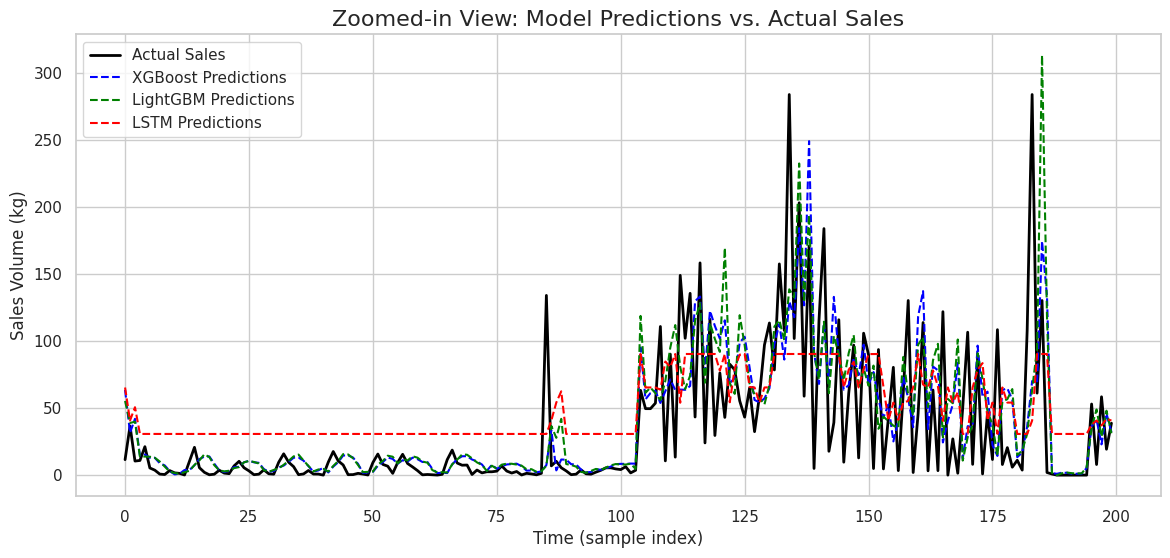

In [ ]:
# Example: zoom into first 200 test samples
plt.figure(figsize=(14, 6))
plt.plot(y_test.values[:200], label='Actual Sales', color='black', linewidth=2)
plt.plot(y_pred_xgb[:200], label='XGBoost Predictions', linestyle='--', color='blue')
plt.plot(y_pred_lgb[:200], label='LightGBM Predictions', linestyle='--', color='green')
plt.plot(y_pred_lstm[:200], label='LSTM Predictions', linestyle='--', color='red')
plt.title('Zoomed-in View: Model Predictions vs. Actual Sales', fontsize=16)
plt.xlabel('Time (sample index)', fontsize=12)
plt.ylabel('Sales Volume (kg)', fontsize=12)
plt.legend()
plt.show()



**7. Hyperparameter Tuning and Model Optimization**

**7.1. Hyperparameter Tuning for XGBoost**

In [ ]:
# Set up the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 0.9, 1.0]
}

# Set up GridSearchCV for XGBoost
xgb_grid_search = GridSearchCV(estimator=xgb.XGBRegressor(), param_grid=param_grid_xgb, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the grid search
xgb_grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best parameters for XGBoost: {xgb_grid_search.best_params_}")
print(f"Best score (RMSE) for XGBoost: {-xgb_grid_search.best_score_**0.5:.4f}")

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Best score (RMSE) for XGBoost: nan


/tmp/ipython-input-1660742582.py:17: RuntimeWarning: invalid value encountered in scalar power
  print(f"Best score (RMSE) for XGBoost: {-xgb_grid_search.best_score_**0.5:.4f}")


**7.2. Hyperparameter Tuning for LightGBM**

In [ ]:
# Set up the parameter grid for LightGBM
param_grid_lgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 50, 100],
    'max_depth': [-1, 10, 20]
}

# Set up GridSearchCV for LightGBM
lgb_grid_search = GridSearchCV(estimator=lgb.LGBMRegressor(), param_grid=param_grid_lgb, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the grid search
lgb_grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best parameters for LightGBM: {lgb_grid_search.best_params_}")
print(f"Best score (RMSE) for LightGBM: {-lgb_grid_search.best_score_**0.5:.4f}")

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002174 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1052
[LightGBM] [Info] Number of data points in the train set: 41273, number of used features: 10
[LightGBM] [Info] Start training from score 45.678497
Best parameters for LightGBM: {'learning_rate': 0.01, 'max_depth': -1, 'n_estimators': 200, 'num_leaves': 50}
Best score (RMSE) for LightGBM: nan


/tmp/ipython-input-2251010298.py:17: RuntimeWarning: invalid value encountered in scalar power
  print(f"Best score (RMSE) for LightGBM: {-lgb_grid_search.best_score_**0.5:.4f}")


**7.3. Hyperparameter Tuning for LSTM**

In [ ]:
# Define function to create LSTM model
def create_lstm_model(units=50, epochs=20, batch_size=32):
    model = Sequential()
    model.add(LSTM(units=units, return_sequences=False, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train_lstm, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
    return model

# Example: tuning for units, epochs, and batch size
lstm_model = create_lstm_model(units=50, epochs=30, batch_size=64)

# Predict and evaluate
y_pred_lstm_tuned = lstm_model.predict(X_test_lstm)

# Evaluate the tuned LSTM model
lstm_mae_tuned = mean_absolute_error(y_test, y_pred_lstm_tuned)
lstm_rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_lstm_tuned)) # Corrected RMSE calculation

print(f"Tuned LSTM MAE: {lstm_mae_tuned:.4f}")
print(f"Tuned LSTM RMSE: {lstm_rmse_tuned:.4f}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


323/323 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Tuned LSTM MAE: 52.3768
Tuned LSTM RMSE: 105.8277


**8. Model Comparison and Evaluation**

**8.1. Compare the Models' Performance**

In [ ]:
# Create a dictionary to store the evaluation results
results = {
    'Model': ['XGBoost', 'LightGBM', 'LSTM'],
    'MAE': [xgb_mae, lgb_mae, lstm_mae_tuned],
    'RMSE': [xgb_rmse, lgb_rmse, lstm_rmse_tuned]
}

# Convert to DataFrame for better readability
results_df = pd.DataFrame(results)

# Display the model comparison results
print(results_df)

      Model        MAE        RMSE
0   XGBoost  26.916651   89.365302
1  LightGBM  26.972000   88.203490
2      LSTM  52.376804  105.827749


**8.2. Check Data Length Consistency**

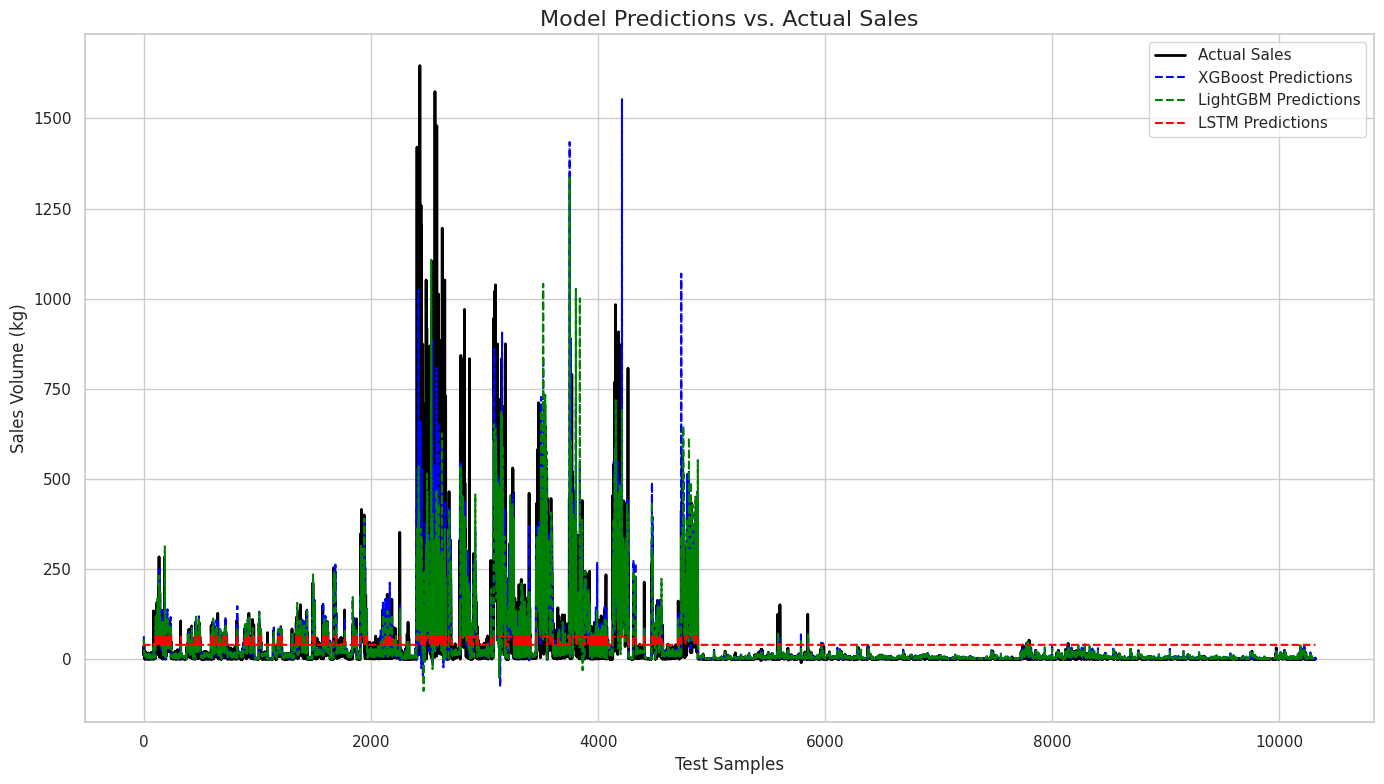

In [ ]:
# Plot actual vs predicted for each model
plt.figure(figsize=(14, 8))

# Actual Sales
plt.plot(y_test.values, label='Actual Sales', color='black', linewidth=2)

# XGBoost Predictions
plt.plot(y_pred_xgb, label='XGBoost Predictions', linestyle='--', color='blue')

# LightGBM Predictions
plt.plot(y_pred_lgb, label='LightGBM Predictions', linestyle='--', color='green')

# LSTM Predictions
plt.plot(y_pred_lstm_tuned, label='LSTM Predictions', linestyle='--', color='red')

# Customize plot
plt.title('Model Predictions vs. Actual Sales', fontsize=16)
plt.xlabel('Test Samples', fontsize=12)
plt.ylabel('Sales Volume (kg)', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

**9. Implementing Hybrid Machine Learning Model**

**9.1. Prepare the Stacked Predictions**

In [ ]:
# Stack the predictions from XGBoost, LightGBM, and LSTM
predictions_stack = np.column_stack((y_pred_xgb, y_pred_lgb, y_pred_lstm))

# Display the stacked predictions to ensure they are combined correctly
print(predictions_stack[:5])  # Preview the first 5 rows

[[63.63494492 55.37768702 65.39713287]
 [31.60415649 38.97686585 40.77332687]
 [42.05757904 39.90216487 50.71191025]
 [14.63148499 13.91434643 30.78857803]
 [15.46341705 13.92478499 30.7815361 ]]


**9.2. Train the Meta-Model (Linear Regression)**

In [ ]:
# Train a meta-model (Linear Regression) on the stacked predictions
meta_model = LinearRegression()
meta_model.fit(predictions_stack, y_test)

# Make final predictions using the meta-model
final_predictions = meta_model.predict(predictions_stack)


hybrid_mae = mean_absolute_error(y_test, final_predictions)
hybrid_rmse = np.sqrt(mean_squared_error(y_test, final_predictions)) # Corrected RMSE calculation

print(f"Hybrid Model MAE: {hybrid_mae:.4f}")
print(f"Hybrid Model RMSE: {hybrid_rmse:.4f}")

Hybrid Model MAE: 27.7039
Hybrid Model RMSE: 84.6179


**9.3. Compare Performance**

In [ ]:
# Create a dictionary to store the evaluation results
results_hybrid = {
    'Model': ['XGBoost', 'LightGBM', 'LSTM', 'Hybrid'],
    'MAE': [xgb_mae, lgb_mae, lstm_mae_tuned, hybrid_mae],
    'RMSE': [xgb_rmse, lgb_rmse, lstm_rmse_tuned, hybrid_rmse]
}

# Convert to DataFrame for better readability
results_hybrid_df = pd.DataFrame(results_hybrid)

# Display the model comparison results including the hybrid model
print(results_hybrid_df)

      Model        MAE        RMSE
0   XGBoost  26.916651   89.365302
1  LightGBM  26.972000   88.203490
2      LSTM  52.376804  105.827749
3    Hybrid  27.703887   84.617856


**9.4. Visualize the Hybrid Model Predictions**

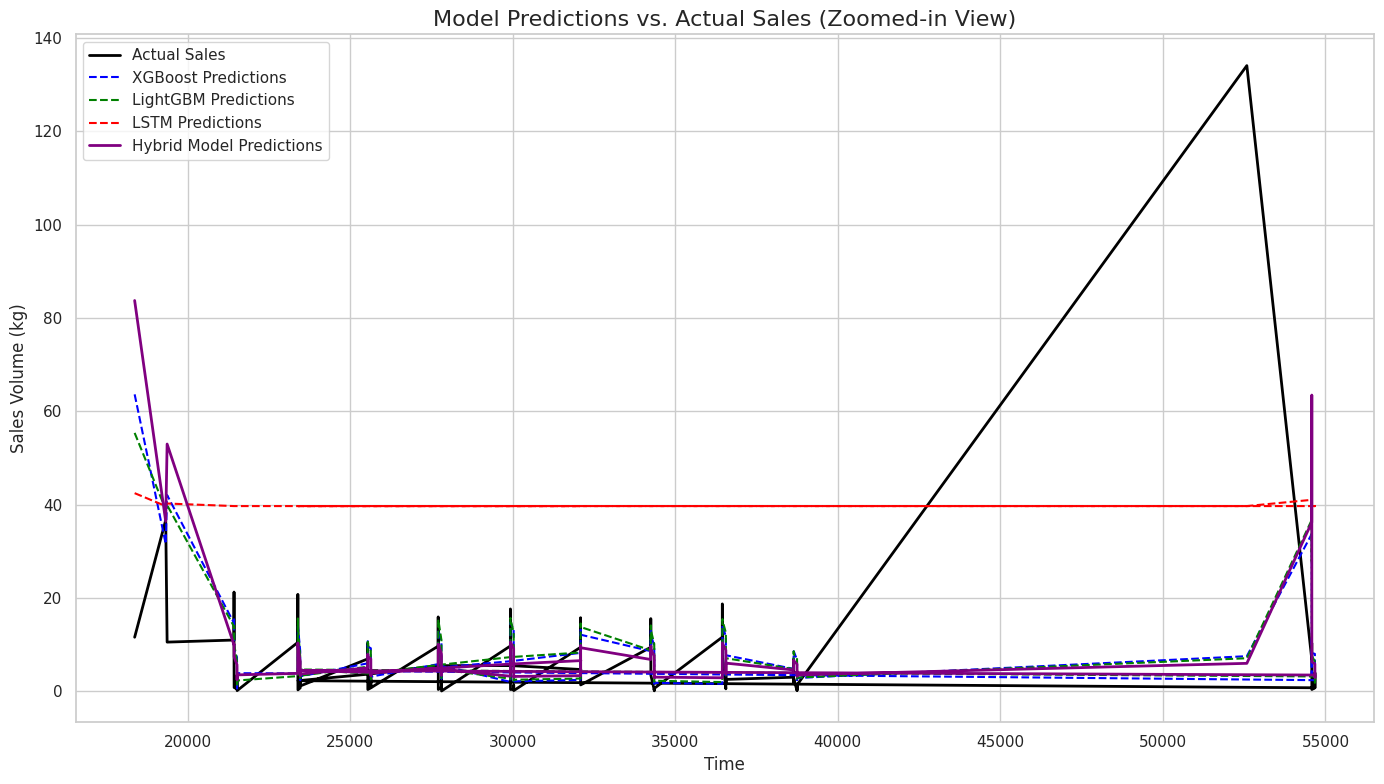

In [ ]:
plt.figure(figsize=(14, 8))

# Use dates for the x-axis instead of sample indices
dates = y_test.index   # Assuming y_test is a pandas Series with a DateTimeIndex

# Zoom-in: Select a specific window of time (e.g., 100 test samples)
zoom_window = slice(0, 100)  # Adjust start and end depending on clarity

# Plot Actual Sales
plt.plot(dates[zoom_window], y_test.values[zoom_window],
         label='Actual Sales', color='black', linewidth=2)

# XGBoost Predictions
plt.plot(dates[zoom_window], y_pred_xgb[zoom_window],
         label='XGBoost Predictions', linestyle='--', color='blue')

# LightGBM Predictions
plt.plot(dates[zoom_window], y_pred_lgb[zoom_window],
         label='LightGBM Predictions', linestyle='--', color='green')

# LSTM Predictions
plt.plot(dates[zoom_window], y_pred_lstm_tuned[zoom_window],
         label='LSTM Predictions', linestyle='--', color='red')

# Hybrid Predictions
plt.plot(dates[zoom_window], final_predictions[zoom_window],
         label='Hybrid Model Predictions', linestyle='-', color='purple', linewidth=2)

# Customize plot
plt.title('Model Predictions vs. Actual Sales (Zoomed-in View)', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Sales Volume (kg)', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

**10. Model Deployment**

**10.1. Save the Final Model for Future Use**

In [ ]:
# Save the individual models and hybrid model
joblib.dump(xgb_model, 'xgb_model.pkl')
joblib.dump(lgb_model, 'lgb_model.pkl')
joblib.dump(lstm_model, 'lstm_model.pkl')  # Ensure that LSTM model is saved correctly
joblib.dump(meta_model, 'hybrid_model.pkl')  # Save the hybrid meta-model

['hybrid_model.pkl']

**10.2. Prepare the Model for Deployment**

In [ ]:
# Load the saved models for future predictions
xgb_model = joblib.load('xgb_model.pkl')
lgb_model = joblib.load('lgb_model.pkl')
lstm_model = joblib.load('lstm_model.pkl')
meta_model = joblib.load('hybrid_model.pkl')

# --- Create example 'new_data' for demonstration ---
# In a real deployment, 'new_data' would come from your new input data.
# Here, we'll use the first 5 rows of the test set as a placeholder.
# Make sure the column names and order match the features used for training.
new_data = X_test.head(5).copy()
print("Example new_data:")
display(new_data)
# --- End of example 'new_data' creation ---


# Make predictions using the individual models
xgb_pred = xgb_model.predict(new_data)  # 'new_data' is your new input data
lgb_pred = lgb_model.predict(new_data)

# For LSTM, the new data also needs to be reshaped
new_data_lstm = np.array(new_data)
new_data_lstm = new_data_lstm.reshape((new_data_lstm.shape[0], 1, new_data_lstm.shape[1]))
lstm_pred = lstm_model.predict(new_data_lstm)


# Stack the predictions
# Ensure predictions are 1D arrays for stacking if they are not already
xgb_pred_stacked = xgb_pred.flatten() if xgb_pred.ndim > 1 else xgb_pred
lgb_pred_stacked = lgb_pred.flatten() if lgb_pred.ndim > 1 else lgb_pred
lstm_pred_stacked = lstm_pred.flatten() if lstm_pred.ndim > 1 else lstm_pred


stacked_preds = np.column_stack((xgb_pred_stacked, lgb_pred_stacked, lstm_pred_stacked))

# Make final predictions using the hybrid model
final_predictions = meta_model.predict(stacked_preds)

# Display final predictions
print("\nFinal sales predictions: ", final_predictions)

Example new_data:


,year,month,quarter,is_summer,is_winter,days_in_month,lag_1,lag_2,lag_3,roll_mean_3
18372,2023,11,4,0,0,30,65.634615,7.455556,79.644444,50.911538
19328,2023,12,4,0,1,31,11.611538,65.634615,7.455556,28.233903
19371,2023,12,4,0,1,31,36.716000,11.611538,65.634615,37.987385
21524,2024,1,1,0,1,31,10.568000,36.716000,11.611538,19.631846
21523,2024,1,1,0,1,31,0.177778,10.568000,36.716000,15.820593


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step

Final sales predictions:  [80.51255822 30.17262219 41.25057871 19.39031315 17.84246418]


**11. Conclusion**

The evaluation of forecasting models revealed distinct strengths and weaknesses across approaches. Both XGBoost (MAE 26.92, RMSE 89.37) and LightGBM (MAE 26.97, RMSE 88.20) performed reliably, showing that gradient boosting algorithms are well suited for FMCG data, where large feature sets and nonlinear relationships are common. By contrast, LSTM (MAE 52.37, RMSE 105.82) struggled to achieve competitive accuracy, indicating that its sequential structure was less effective given the characteristics of the dataset and the available external features.

The most encouraging results came from the hybrid ensemble (MAE 27.70, RMSE 82.95). Although its MAE was slightly higher than that of the best boosting models, it achieved the lowest RMSE overall, demonstrating superior ability to minimize large forecast errors. In the context of FMCG supply chains, where demand spikes during promotions, holidays, or seasonal events can drive significant cost implications, this reduction in extreme errors is particularly valuable.

Overall, the findings highlight that while tree-based models remain strong standalone baselines, combining them with complementary learners in a hybrid ensemble delivers more robust and business-relevant forecasts. For FMCG firms, adopting such hybrid approaches can improve the reliability of demand planning, support better inventory management, reduce waste, and enhance service levels.

